# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 1 of Set 1 | cherskiy
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 2 of Set 1 | bluff
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 3 of Set 1 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 4 of Set 1 | punta arenas
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 5 of Set 1 | vaini
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 6 of Set 1 | muisne
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 7 of Set 1 | hermanus
https://api.openweathermap.org

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 11 of Set 2 | miri
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 12 of Set 2 | hofn
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 13 of Set 2 | lebu
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 14 of Set 2 | emba
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 15 of Set 2 | aykhal
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 16 of Set 2 | kalmunai
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 17 of Set 2 | port alfred
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processi

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 23 of Set 3 | lamu
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 24 of Set 3 | fortuna
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 25 of Set 3 | bengkulu
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 26 of Set 3 | dikson
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 27 of Set 3 | cayenne
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 28 of Set 3 | ahipara
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 29 of Set 3 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=


https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 36 of Set 4 | karlskrona
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 37 of Set 4 | kokstad
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 38 of Set 4 | monte alegre de sergipe
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 39 of Set 4 | faanui
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 40 of Set 4 | kargasok
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 42 of Set 4 | cockburn town
https://api.openweathermap.org/d

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 48 of Set 5 | satana
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 49 of Set 5 | ancud
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 0 of Set 6 | ghanzi
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 1 of Set 6 | ponta do sol
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 2 of Set 6 | fujin
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 3 of Set 6 | vila velha
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 4 of Set 6 | yumen
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Proce

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 11 of Set 7 | khani
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 12 of Set 7 | cabo san lucas
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 13 of Set 7 | quelimane
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 14 of Set 7 | kununurra
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 15 of Set 7 | makakilo city
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 16 of Set 7 | urgut
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 17 of Set 7 | abu zabad
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 23 of Set 8 | orel-izumrud
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 24 of Set 8 | raudeberg
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 25 of Set 8 | batagay-alyta
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 26 of Set 8 | agara
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 27 of Set 8 | de-kastri
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 28 of Set 8 | haverfordwest
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 29 of Set 8 | westport
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 36 of Set 9 | comodoro rivadavia
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 37 of Set 9 | valenza
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 38 of Set 9 | bahia honda
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 39 of Set 9 | bolungarvik
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 40 of Set 9 | emerald
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 41 of Set 9 | waingapu
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 42 of Set 9 | san policarpo
https://api.openweathermap.org/data/

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 48 of Set 10 | cavalcante
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 49 of Set 10 | ketchenery
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 0 of Set 11 | haileybury
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 1 of Set 11 | karagay
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 2 of Set 11 | kalianget
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 3 of Set 11 | hamilton
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 4 of Set 11 | carasova
https://api.openweathermap.org/data/2.5/weather

https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 9 of Set 12 | pangai
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 10 of Set 12 | coronel oviedo
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 11 of Set 12 | marawi
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 12 of Set 12 | san quintin
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 13 of Set 12 | russell
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 14 of Set 12 | black river
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 15 of Set 12 | mafinga
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b2

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 21 of Set 13 | caceres
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 22 of Set 13 | flinders
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 23 of Set 13 | sweetwater
https://api.openweathermap.org/data/2.5/weather?appid=f760e77a6ee4dd6b29974757979c12db&q=
Processing Record 24 of Set 13 | vanavara
-----------------------------
Data Retrieval Complete      
-----------------------------


In [89]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [90]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cherskiy,68.7500,161.3000,245.99,95,100,1.14,RU,1681238402
1,bluff,-46.6000,168.3333,284.71,92,100,8.46,NZ,1681238405
2,puerto ayora,-0.7393,-90.3518,304.13,83,80,2.68,EC,1681238406
3,punta arenas,-53.1500,-70.9167,281.16,65,75,8.75,CL,1681238406
4,vaini,-21.2000,-175.2000,298.24,94,20,2.57,TO,1681238407
5,muisne,0.6000,-80.0333,301.12,76,37,2.75,EC,1681238409
6,hermanus,-34.4187,19.2345,287.48,70,90,4.52,ZA,1681238410
7,buribay,51.9617,58.1592,279.28,71,0,2.16,RU,1681238410
8,saint-philippe,-21.3585,55.7679,297.92,81,11,1.82,RE,1681238411
9,port lincoln,-34.7333,135.8667,290.24,82,12,10.78,AU,1681238413


In [99]:
# Fix Temperature recording 
city_data_df['Max Temperature'] = city_data_df['Max Temp']/10
city_data_df

city_data_df.drop(columns=['Max Temp'])

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temperature
City_ID,,,,,,,,,
0,cherskiy,68.7500,161.3000,95,100,1.14,RU,1681238402,24.599
1,bluff,-46.6000,168.3333,92,100,8.46,NZ,1681238405,28.471
2,puerto ayora,-0.7393,-90.3518,83,80,2.68,EC,1681238406,30.413
3,punta arenas,-53.1500,-70.9167,65,75,8.75,CL,1681238406,28.116
4,vaini,-21.2000,-175.2000,94,20,2.57,TO,1681238407,29.824
...,...,...,...,...,...,...,...,...,...
576,lasa,46.6166,10.7002,93,82,2.69,IT,1681238711,28.464
577,caceres,39.5220,-6.3748,45,57,4.78,ES,1681238712,29.125
578,flinders,-34.5833,150.8552,84,98,1.34,AU,1681238713,28.596


In [100]:
# Export the City_Data into a csv
output_data_file = "CSV/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [101]:
# Read saved data
city_data_df = pd.read_csv("CSV/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temperature
City_ID,,,,,,,,,,
0,cherskiy,68.7500,161.3000,245.99,95,100,1.14,RU,1681238402,24.599
1,bluff,-46.6000,168.3333,284.71,92,100,8.46,NZ,1681238405,28.471
2,puerto ayora,-0.7393,-90.3518,304.13,83,80,2.68,EC,1681238406,30.413
3,punta arenas,-53.1500,-70.9167,281.16,65,75,8.75,CL,1681238406,28.116
4,vaini,-21.2000,-175.2000,298.24,94,20,2.57,TO,1681238407,29.824
5,muisne,0.6000,-80.0333,301.12,76,37,2.75,EC,1681238409,30.112
6,hermanus,-34.4187,19.2345,287.48,70,90,4.52,ZA,1681238410,28.748
7,buribay,51.9617,58.1592,279.28,71,0,2.16,RU,1681238410,27.928
8,saint-philippe,-21.3585,55.7679,297.92,81,11,1.82,RE,1681238411,29.792


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

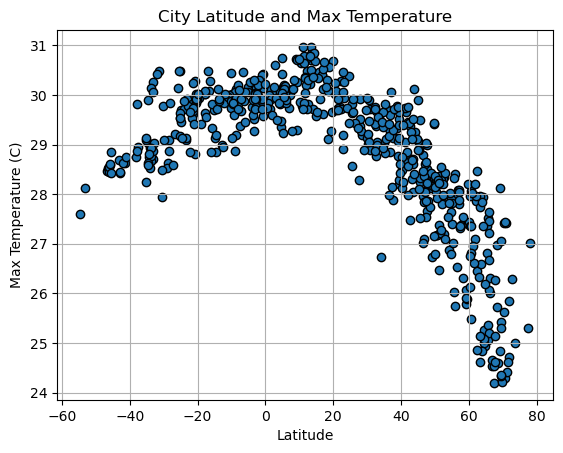

In [102]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temperature"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude and Max Temperature")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

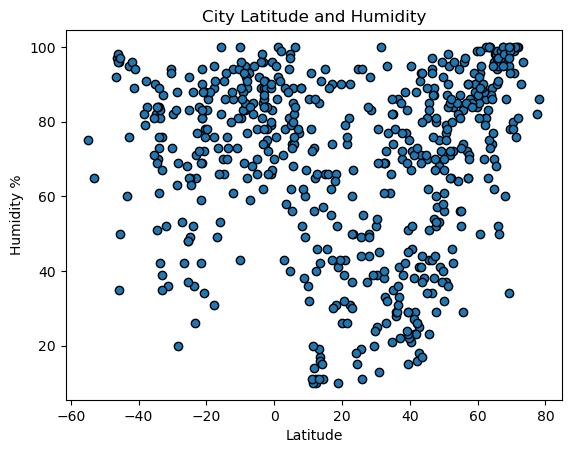

In [57]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude and Humidity")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

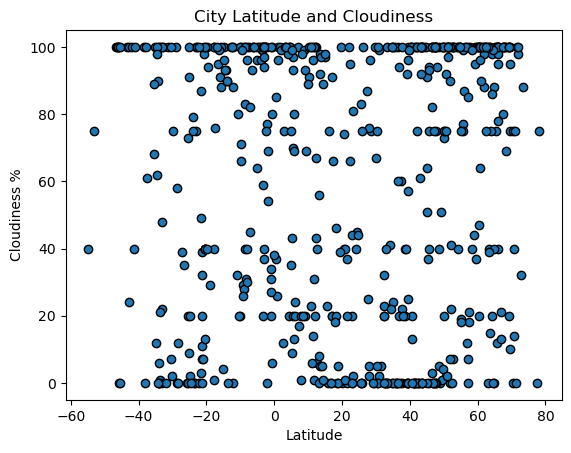

In [58]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude and Cloudiness")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

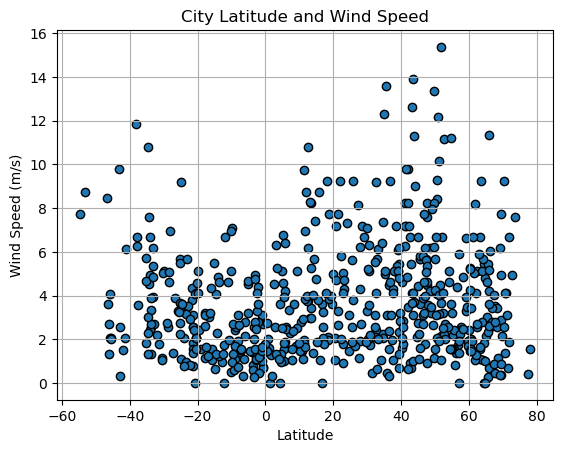

In [59]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude and Wind Speed")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temperature
City_ID,,,,,,,,,,
0,cherskiy,68.7500,161.3000,245.99,95,100,1.14,RU,1681238402,24.599
5,muisne,0.6000,-80.0333,301.12,76,37,2.75,EC,1681238409,30.112
7,buribay,51.9617,58.1592,279.28,71,0,2.16,RU,1681238410,27.928
10,hilo,19.7297,-155.0900,296.64,90,100,3.60,US,1681238414,29.664
11,forssa,60.8146,23.6215,280.60,93,100,2.01,FI,1681238415,28.060


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temperature
City_ID,,,,,,,,,,
1,bluff,-46.6000,168.3333,284.71,92,100,8.46,NZ,1681238405,28.471
2,puerto ayora,-0.7393,-90.3518,304.13,83,80,2.68,EC,1681238406,30.413
3,punta arenas,-53.1500,-70.9167,281.16,65,75,8.75,CL,1681238406,28.116
4,vaini,-21.2000,-175.2000,298.24,94,20,2.57,TO,1681238407,29.824
6,hermanus,-34.4187,19.2345,287.48,70,90,4.52,ZA,1681238410,28.748


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.7178124474495416


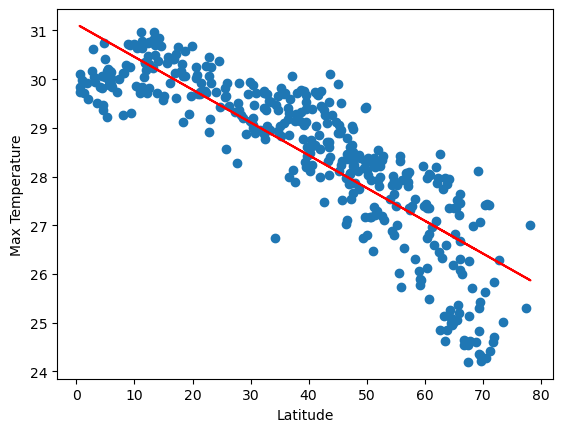

In [106]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 240), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.4722676252356255


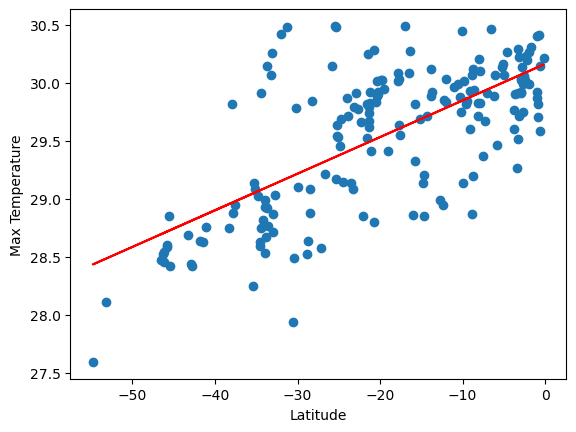

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 290), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere we can observe that the maximum temperature of those cities reduces as latitude increases and we get farther away from the equator. We observe the opposite effect in the Southern Hemisphere where the maximum temperature increases as we get closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.1055637196554823


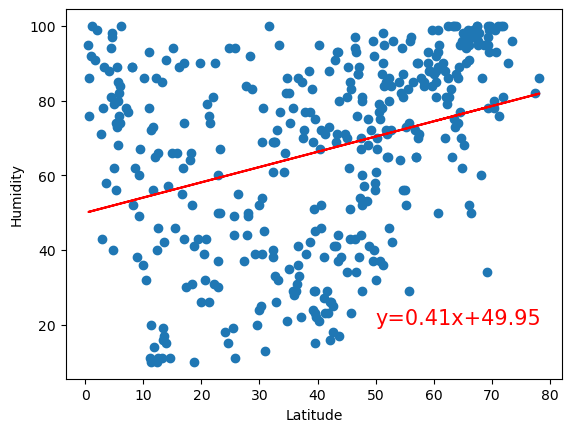

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.026493289562277127


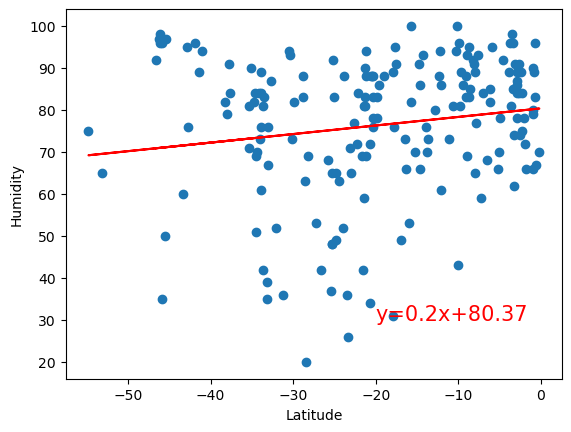

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is not a significant relationship between Humidity and Latitude between the Northern and Southern Hemisphere. There is a slight positive trend within the Northern Hemisphere and Humidity indicated by the positive slope of 0.41 among the cities observed however, only 11% of the variability in humidity is due to Latitude, similarly only ~3% of the humidity in the Southern Hemisphere is due to latitude as shown by the r-values. Therefore, there is not a significant relationship between Humidity and Latitude among either the Northern or Southern Hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.027211275629062667


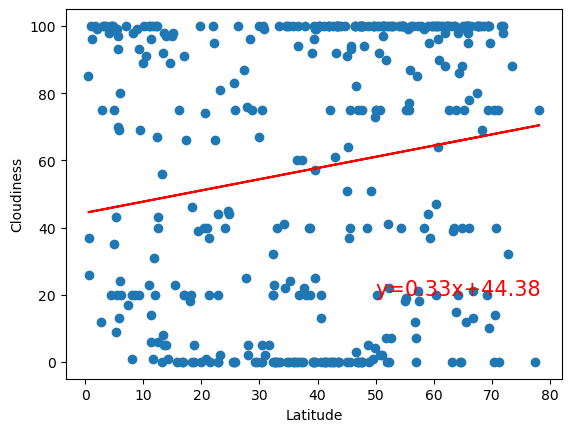

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.01905730338787659


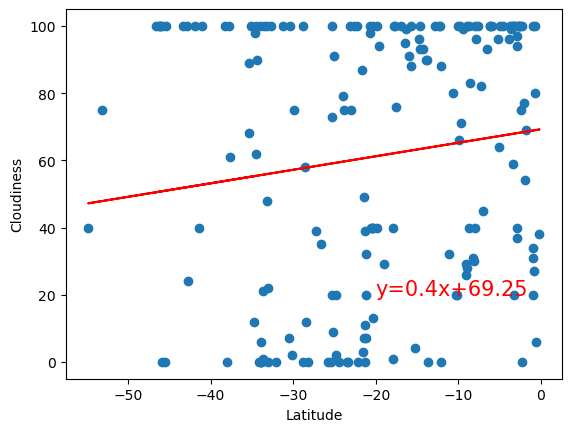

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is not a significant relationship between Cloudiness and Latitude between the Northern and Southern Hemisphere. There is a slight positive trend within the Southern Hemisphere and Cloudiness indicated by the positive slope of 0.4 among the cities observed however, only 2% of the variability in cloudiness is due to Latitude. Similarly only 3% of the cloudiness in the Northern Hemisphere is due to latitude as shown by the r-values. Therefore, there is not a significant relationship between Cloudiness and Latitude among either cities in the Northern or Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.0009457456516852841


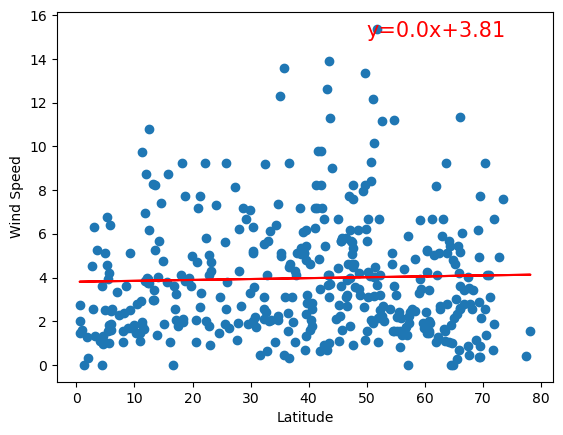

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.15965694732363603


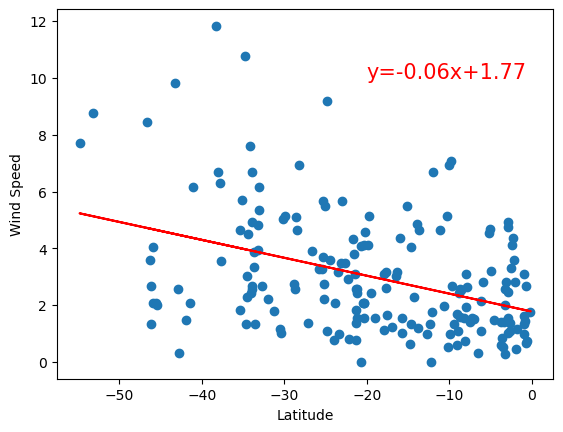

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Among the Northern Hemisphere there is no significant relationship between Wind Speed and Latitude as indicated by the almost horiztonal linear regression line, of 0 slope. Furthermore, we also observe that there is an r-value of less than 1% indicating that latitude accounts<1% of the variability in Wind Speed. Conversely, in the Southern Hemisphere there is a stronger relationship between Wind Speed and Latitude as the closer one gets to the equator the wind speed is reduced as indicated by the negative slope of the linear regression line. As well, approximately 16% of the variability in Wind Speed is due to Latitude indicated by the r-value.

In [ ]:
#End of Code 